# H2O model interpretation
Needs to be executed with papermill

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import h2o
from models.h2o import H2o
import os
import glob
from modules.analysis import *

In [2]:
# loads model paths and exp_ids
reps = list(range(0, 3))

exp_id = '2022102713559613'

models = []
exp_paths = []
for rep in reps:
    exp_path = os.path.join('experiments', exp_id + '_' + str(rep))
    exp_paths.append(exp_path)
    models.append(H2o.load(os.path.join(exp_path, 'fold_0')))

Checking whether there is an H2O instance running at http://localhost:54321 .

.

.

.

.

 not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.3-internal" 2022-04-19; OpenJDK Runtime Environment (build 17.0.3-internal+0-adhoc..src); OpenJDK 64-Bit Server VM (build 17.0.3-internal+0-adhoc..src, mixed mode, sharing)
  Starting server from /global/scratch/users/maxgaber/envs/_h2o/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy5opwymi
  JVM stdout: /tmp/tmpy5opwymi/h2o_maxgaber_started_from_python.out
  JVM stderr: /tmp/tmpy5opwymi/h2o_maxgaber_started_from_python.err


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ...

 successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_maxgaber_zc6jam
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,40
H2O_cluster_allowed_cores:,40
H2O_cluster_status:,"locked, healthy"


Checking whether there is an H2O instance running at http://localhost:54321 .

 connected.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_maxgaber_zc6jam
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,40
H2O_cluster_allowed_cores:,40
H2O_cluster_status:,"locked, healthy"


Checking whether there is an H2O instance running at http://localhost:54321 .

 connected.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_maxgaber_zc6jam
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,40
H2O_cluster_allowed_cores:,40
H2O_cluster_status:,"locked, healthy"


In [3]:
# load base models
df_models = []
# loop over 30 bootrap models
for idx, bootstrap_model in enumerate(models):
    
    # loop over base models
    base_models = []
    base_models_imp = []
    if 'base_models' in bootstrap_model.actual_params:
        
        # get metalearner
        metalearner = h2o.get_model(bootstrap_model.metalearner()['name']).varimp()
        metalearner = pd.DataFrame(metalearner, columns=['model', 'relimp', 'scaimp', 'perc']).set_index('model')
        
        for base_model in bootstrap_model.actual_params['base_models']:
            base_models.append(base_model['name'])
            base_models_imp.append(metalearner.loc[base_model['name'], 'perc'])
    else:
        base_models.append(bootstrap_model_name.split('/')[1])
        base_models_imp.append(1)
            
    df_base_models = pd.DataFrame(base_models, columns=['base_model'])
    df_base_models['rep'] = reps[idx]
    df_base_models['path'] = glob.glob(os.path.join(exp_paths[idx], 'fold_0', '*_AutoML_*'))[0]
    df_base_models['importance'] = base_models_imp
    df_models.append(df_base_models)
    
df_models = pd.concat(df_models, ignore_index=True)
df_models['base_model_type'] = df_models['base_model'].str.split('_').str[0]
df_models['model_type'] = df_models['path'].str.split('/').str[-1].str.split('_').str[0:2].str.join(' ')
df_models

/global/scratch/users/maxgaber/envs/_h2o/lib/python3.8/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(
/global/scratch/users/maxgaber/envs/_h2o/lib/python3.8/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(
/global/scratch/users/maxgaber/envs/_h2o/lib/python3.8/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_en

,base_model,rep,path,importance,base_model_type,model_type
0,GBM_1_AutoML_1_20221027_22908,0,experiments/2022102713559613_0/fold_0/StackedE...,0.592073,GBM,StackedEnsemble BestOfFamily
1,GLM_1_AutoML_1_20221027_22908,0,experiments/2022102713559613_0/fold_0/StackedE...,0.395533,GLM,StackedEnsemble BestOfFamily
2,XGBoost_1_AutoML_1_20221027_22908,0,experiments/2022102713559613_0/fold_0/StackedE...,0.012394,XGBoost,StackedEnsemble BestOfFamily
3,GBM_5_AutoML_1_20221027_22909,1,experiments/2022102713559613_1/fold_0/StackedE...,0.348739,GBM,StackedEnsemble BestOfFamily
4,DRF_1_AutoML_1_20221027_22909,1,experiments/2022102713559613_1/fold_0/StackedE...,0.171185,DRF,StackedEnsemble BestOfFamily
5,XGBoost_3_AutoML_1_20221027_22909,1,experiments/2022102713559613_1/fold_0/StackedE...,0.018332,XGBoost,StackedEnsemble BestOfFamily
6,DeepLearning_1_AutoML_1_20221027_22909,1,experiments/2022102713559613_1/fold_0/StackedE...,0.188276,DeepLearning,StackedEnsemble BestOfFamily
7,XRT_1_AutoML_1_20221027_22909,1,experiments/2022102713559613_1/fold_0/StackedE...,0.092550,XRT,StackedEnsemble BestOfFamily
8,GLM_1_AutoML_1_20221027_22909,1,experiments/2022102713559613_1/fold_0/StackedE...,0.180918,GLM,StackedEnsemble BestOfFamily
9,GBM_5_AutoML_1_20221027_22941,2,experiments/2022102713559613_2/fold_0/StackedE...,0.367535,GBM,StackedEnsemble BestOfFamily


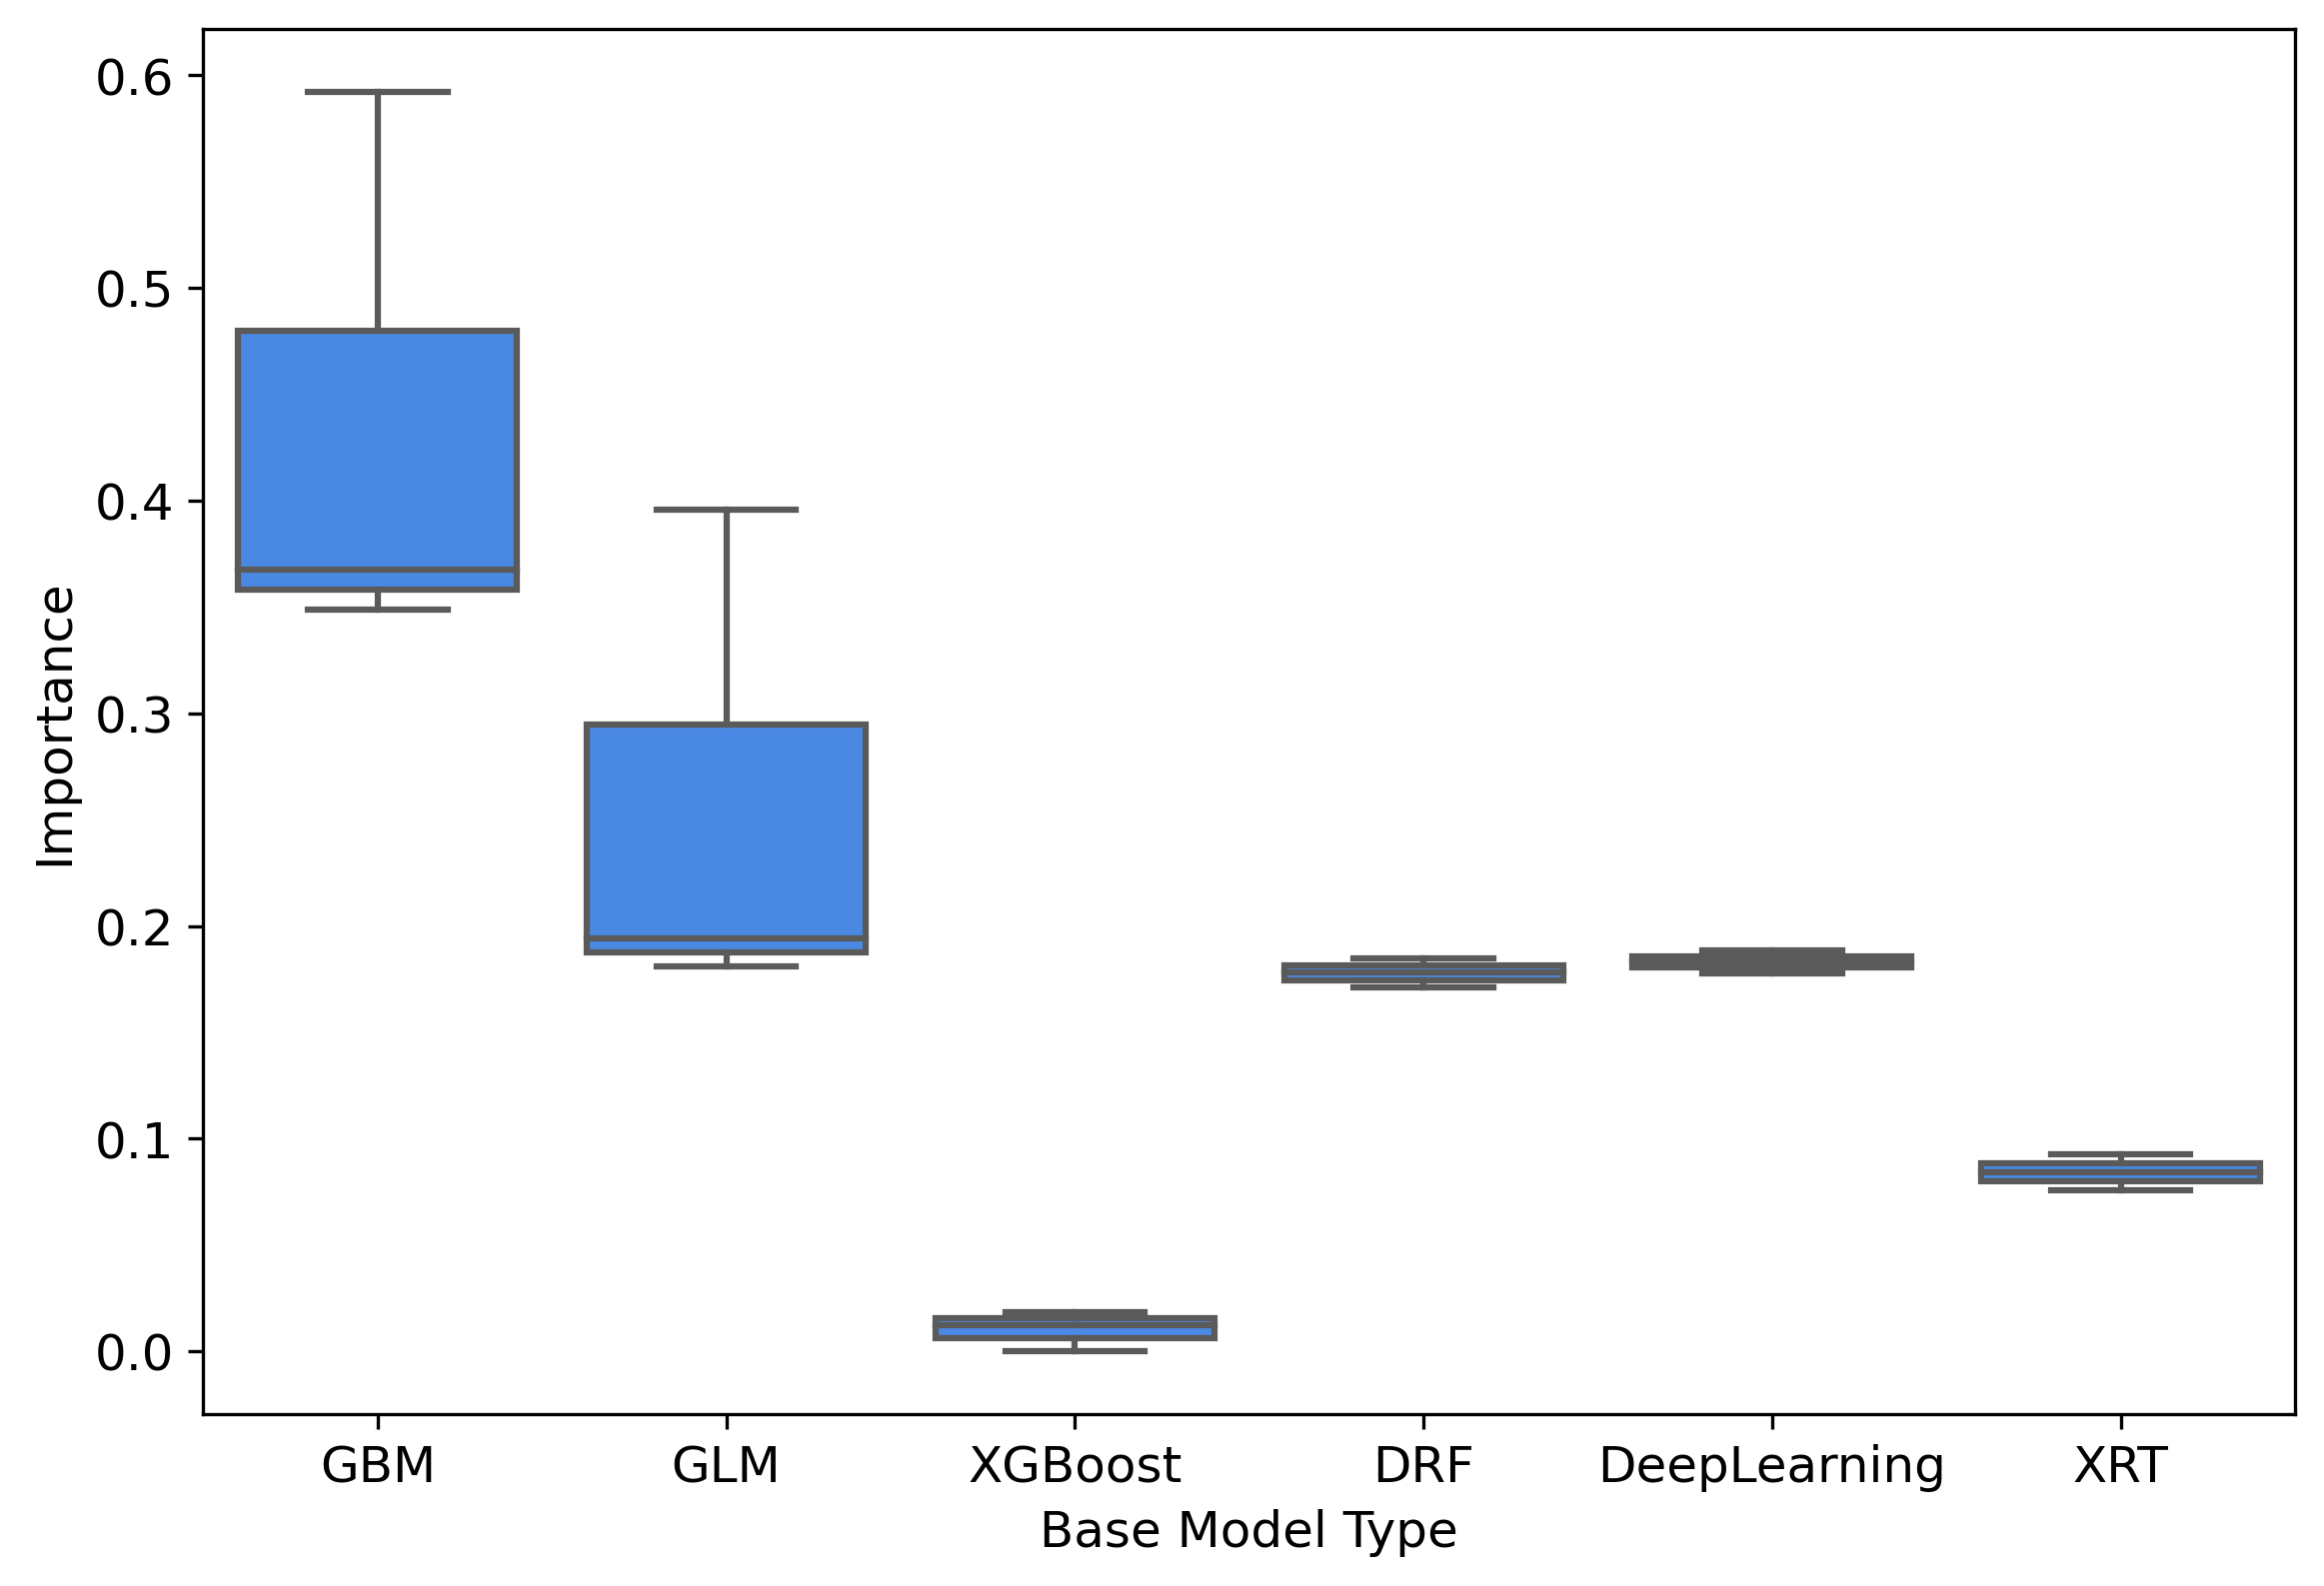

In [4]:
sns.boxplot(data=df_models, x='base_model_type', y='importance', color=sns.color_palette()[0])
plt.xlabel('Base Model Type')
plt.ylabel('Importance')
plt.savefig('')